## Final Project Submission

Please fill out:
* Student name: Ramil Chaimongkolbutr
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Max Barry
* Blog post URL: https://ramil-ming.medium.com/


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Getting Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

# Importing and Exploring Data Set

File: tn.movie_budgets.csv.gz

In [3]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip',
                   error_bad_lines=False)
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


File: tmdb.movies.csv.gz

In [4]:
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip',
                   error_bad_lines=False)

File: rt.reviews.tsv.gz

In [5]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_1')

File: rt.movie_info.tsv.gz

In [6]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', encoding='iso8859_1')

File: imdb.title.ratings.csv.gz

In [7]:
rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', error_bad_lines=False)

File: imdb.title.principals.csv.gz

In [8]:
princ = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip', error_bad_lines=False)

File: imdb.title.crew.csv.gz

In [9]:
crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', error_bad_lines=False)

File: imdb.title.basics.csv.gz

In [10]:
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', error_bad_lines=False)

File: imdb.title.akas.csv.gz

In [11]:
akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', error_bad_lines=False)

File: imdb.name.basics.csv.gz

In [12]:
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', error_bad_lines=False)

File: bom.movie_gross.csv.gz

In [13]:
gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', error_bad_lines=False)
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Total revenue generated by genre



**Assign the data set to a dataframe variable and explore.**

In [14]:
gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', error_bad_lines=False)
print(gross.info())
gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**Create a column for total gross which is a total revenue that we want.**

In [15]:
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'],errors='coerce')

In [16]:
gross['total_gross'] = gross['domestic_gross'] + gross['foreign_gross']

**Assign the dataframe to new variable to start working with it** 
    - 100 movies are good enough 

In [17]:
working = gross.sort_values('total_gross', ascending=False)[:100]

**Import another dataset that includes "genre" column**

In [18]:
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', error_bad_lines=False)
print(basics.info())
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


**Use a new variable to work with the result from merging**

In [19]:
test = working.join(basics.set_index('primary_title'), how='left', on='title' )

**Clean our dataset**

In [20]:
test['title'].duplicated().value_counts()

False    100
True      13
Name: title, dtype: int64

In [21]:
test = test[test['title'].duplicated() == False]

**We found that there are a number of rows that don't have a genre assigned to. This is a result of different title name format in 2 datasets.
  We Assign a new dataframe for the titles that have a format problem**

In [22]:
name_prob = test[test['genres'].isna()]

**Using Difflib to fix title name format conflix** 

In [23]:
import difflib

In [24]:
for i in name_prob.index:
    try:
        best_match = difflib.get_close_matches(test.loc[i, 'title'], basics['primary_title'], n=1)
        test.loc[i, 'title'] = best_match[0] 
    except:
        test.loc[i, 'title'] = test.loc[i, 'title']

In [25]:
test2 = test[test.columns[:5]]

**Now we can join tables**

In [26]:
finished = test2.join(basics.set_index('primary_title'), how='left', on='title' )

In [27]:
finished = finished[finished['title'].duplicated() == False]

In [28]:
finished['genres'].isna().sum()

2

In [29]:
finished[finished['genres'].isna() == True]

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
2768,Coco,BV,209700000.0,597400000.0,2017,tt10453328,Coco,2018.0,NaN,NaN
736,MIB 3,Sony,179000000.0,445000000.0,2012,NaN,NaN,NaN,NaN,NaN


**Even through we commonly know what exactly genres these 2 movies are, I chose to leave it "missing" for the sake of database that we use**

In [30]:
finished['genres'].fillna('Missing', inplace=True)

In [31]:
finished2 = finished[finished.columns[:4]]

**Create total gross column**

In [32]:
finished2['total'] = finished2['domestic_gross'] + finished2['foreign_gross']

<ipython-input-32-9b878141ea44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finished2['total'] = finished2['domestic_gross'] + finished2['foreign_gross']


In [33]:
finished2['genres'] = finished['genres']

<ipython-input-33-f5639281b669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finished2['genres'] = finished['genres']


In [34]:
finished2.sort_values('total', ascending=False)

,title,studio,domestic_gross,foreign_gross,total,genres
727,The Avengers,BV,623400000.0,895500000.0,1.518900e+09,"Action,Adventure,Sci-Fi"
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,"Action,Adventure,Sci-Fi"
3080,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,"Action,Adventure,Sci-Fi"
328,Harry Potter and the Deathly Hallows: Part 2,WB,381000000.0,960500000.0,1.341500e+09,"Adventure,Drama,Fantasy"
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...
3090,Ready Player One,WB,137700000.0,445200000.0,5.829000e+08,"Action,Adventure,Sci-Fi"
3091,Operation Red Sea,WGUSA,1500000.0,577700000.0,5.792000e+08,"Action,Drama,Thriller"
1882,Fifty Shades of Grey,Uni.,166200000.0,404800000.0,5.710000e+08,"Drama,Romance,Thriller"
2774,Kong: Skull Island,WB,168100000.0,398600000.0,5.667000e+08,"Action,Adventure,Fantasy"


In [35]:
finished2['genres'].value_counts()

Action,Adventure,Sci-Fi       23
Adventure,Animation,Comedy    14
Action,Adventure,Fantasy      11
Action,Adventure,Comedy        7
Action,Adventure,Animation     5
Action,Adventure,Thriller      5
Adventure,Drama,Fantasy        5
Adventure,Family,Fantasy       4
Action,Crime,Thriller          2
Action,Drama,Thriller          2
Adventure,Fantasy              2
Missing                        2
Adventure,Drama,Sci-Fi         2
Biography,Drama,Music          1
Drama,Fantasy,Romance          1
Drama,Sci-Fi,Thriller          1
Action,Sci-Fi,Thriller         1
Drama,Romance,Thriller         1
Action,Adventure,Drama         1
Horror,Thriller                1
Animation                      1
Crime,Drama                    1
Comedy,Mystery                 1
Animation,Comedy,Family        1
Adventure,Drama,Sport          1
Documentary                    1
Action,Adventure,Family        1
Action,Thriller                1
Adventure,Fantasy,Mystery      1
Name: genres, dtype: int64

In [36]:
group_genres = finished2.groupby('genres').sum()

**Now we pick only top 25 genres to present in a graph**

In [119]:
for_graph = group_genres.sort_values('total', ascending=False)[:10]
for_graph

,domestic_gross,foreign_gross,total
genres,,,
"Action,Adventure,Sci-Fi",8.055500e+09,1.326320e+10,2.131870e+10
"Adventure,Animation,Comedy",4.056800e+09,8.022900e+09,1.207970e+10
"Action,Adventure,Fantasy",3.273200e+09,6.037100e+09,9.310300e+09
"Action,Adventure,Comedy",2.340800e+09,3.297100e+09,5.637900e+09
"Adventure,Drama,Fantasy",1.380100e+09,2.810800e+09,4.190900e+09
"Action,Adventure,Thriller",1.129100e+09,3.028800e+09,4.157900e+09
"Action,Adventure,Animation",1.360500e+09,2.414400e+09,3.774900e+09
"Adventure,Family,Fantasy",1.030800e+09,2.483500e+09,3.514300e+09
"Adventure,Fantasy",5.135000e+08,1.400900e+09,1.914400e+09


**Visualization**

In [38]:
for_graph_reset_index = for_graph.reset_index()
for_graph_reset_index['genres'] = for_graph_reset_index['genres'].astype(str)

glabels = for_graph_reset_index['genres'].values
y = np.arange(len(glabels))
revenue = for_graph_reset_index['total'].values


Text(0.5, 1.0, 'Total Revenue by Genres')

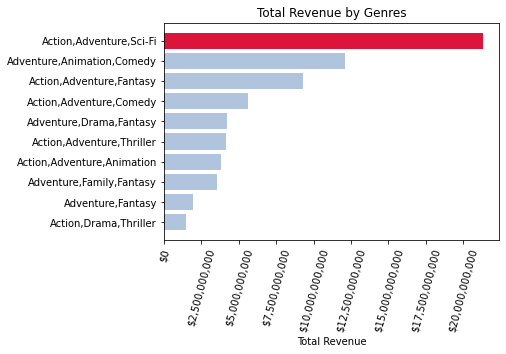

In [39]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
ax.barh(y, revenue, align='center', color=['crimson', 'lightsteelblue','lightsteelblue',\
                                           'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue'])

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_yticks(y)
ax.set_yticklabels(glabels)
ax.invert_yaxis()
plt.xticks(rotation=75)
ax.set_xlabel('Total Revenue')
ax.set_title('Total Revenue by Genres')

# High Rating Director

**Import relavent datasets. Even though we did it already above, we do it again in case we want to check it out, we don't have to go up to see it**

In [40]:
rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', error_bad_lines=False)

In [41]:
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', error_bad_lines=False)

In [42]:
crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', error_bad_lines=False)

In [43]:
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', error_bad_lines=False)

**join crew database with basics**

In [44]:
crew_basics = crew.join(basics.set_index('tconst'), how='left', on='tconst')

**join rating with the result from crew and basics**

In [45]:
rating_crew_basics = rating.join(crew_basics.set_index('tconst'), how='left', on='tconst')

**Add another dataset**

In [46]:
akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', error_bad_lines=False)

**Join akas because we want our dataset to have region which we will narrow down to only in US**

In [47]:
finished = rating_crew_basics.join(akas.set_index('title'), how='left', on='primary_title')
workingdf = finished[finished['region']=='US'][['averagerating', 'numvotes', 'directors','genres', 'primary_title']]

In [120]:
workingdf.drop_duplicates(inplace=True)

,averagerating,numvotes,directors,genres,primary_title
3,4.2,50352,nm0001317,"Action,Adventure,Fantasy",The Legend of Hercules
6,7.0,1613,nm1464150,"Biography,Drama,Sport",The Hammer
9,4.2,148,nm2874896,"Action,Adventure,Sci-Fi",Vanquisher
10,5.1,8296,nm0847859,Comedy,Baggage Claim
11,5.8,2381,nm0153774,"Comedy,Drama,Romance",The Four-Faced Liar
...,...,...,...,...,...
73824,4.1,293,nm1058259,"Action,Horror,Thriller",The Car: Road to Revenge
73831,3.7,4057,nm1293225,"Biography,Drama",PM Narendra Modi
73846,6.3,21,nm0663605,Documentary,Out
73853,4.7,14,nm1272773,"Action,Drama",Sisters


**We almost get a table for a graph but we still need to assign director codes to names**

In [121]:
graphing = workingdf[workingdf['numvotes'] >= workingdf['numvotes'].mean()].sort_values('averagerating', ascending=False)[:20]
graphing

,averagerating,numvotes,directors,genres,primary_title
4461,9.4,9629,"nm9988436,nm6041686,nm3591496",Drama,Peranbu
49629,9.3,17308,"nm2871077,nm1919905",Drama,Wheels
60112,8.9,14946,nm1554601,"Biography,Crime,Documentary",O.J.: Made in America
63498,8.8,1841066,nm0634240,"Action,Adventure,Sci-Fi",Inception
59785,8.8,441135,"nm0751577,nm0751648","Action,Adventure,Sci-Fi",Avengers: Endgame
58930,8.8,10903,nm4242320,"Drama,Romance",96
59127,8.6,30292,nm2336554,"Action,Drama,War",Uri: The Surgical Strike
41921,8.6,15407,nm1335875,"Action,Drama",The Stage
24920,8.6,1299334,nm0634240,"Adventure,Drama,Sci-Fi",Interstellar
46993,8.5,123638,nm4318159,"Action,Biography,Drama",Dangal


**Getting director names from the id**

In [50]:
def getDirName(entry):
    dirlist = []
    codelist = entry.split(',')
    for code in codelist:
        name = name_basics[name_basics['nconst'] == code]['primary_name'].values[0]
        dirlist.append(name)
    return dirlist

In [51]:
graphing['director_name'] = graphing['directors'].map(getDirName)

**Make sure that we have the name in string**

In [52]:
graphing['dirname_str'] = [', '.join(map(str, dname)) for dname in graphing['director_name']]

**Visualization**

Text(0.5, 1.0, 'Top Director with High Movie Rating')

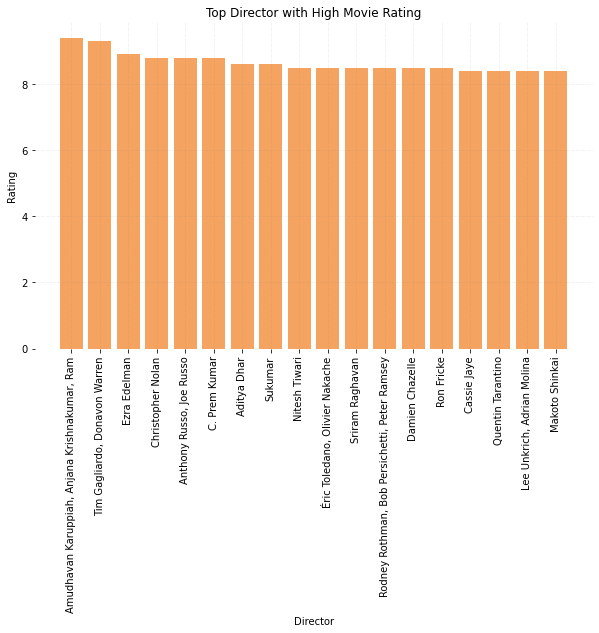

In [53]:
name = graphing['dirname_str']
rate = graphing['averagerating']

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(name, rate, color='sandybrown', capsize=7 )
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
ax.set_ylabel('Rating')
ax.set_xlabel('Director')
plt.xticks(rotation=90)
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.set_title("Top Director with High Movie Rating")

**Option for this visualization**

In [76]:
!pip install pygal

In [95]:
import pygal
from pygal.style import RedBlueStyle
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [96]:
df = graphing[['dirname_str', 'averagerating']][:10]
df = df.drop_duplicates(subset=['dirname_str'])

In [104]:
bar_chart = pygal.Bar(style=RedBlueStyle, width=600, height=500, legend_at_bottom=True, human_readable=True,
                      title='Top Directors with High Movie Rating')

for index, row in df.iterrows():
    bar_chart.add(row["dirname_str"], row["averagerating"])

galplot(bar_chart)

# Movie Release Season 

**Import the dataset**

In [54]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', error_bad_lines=False)

**Fixing string formatted number, and convert it to float** 

In [55]:
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

**Create a column for net profit**

In [56]:
budgets['total_revenue'] = (budgets['worldwide_gross'] + budgets['domestic_gross'])
budgets['net_profit'] = budgets['total_revenue'] - budgets['production_budget']

**Group months into seasons**

In [57]:
budgets['month'] = budgets['release_date'].map(lambda x: x[:3])

In [58]:
def seasonMe(month):
    if (month == 'Dec' or month == 'Jan' or month == 'Feb'):
        return "Winter"
    elif (month == 'Mar' or month == 'Apr' or month == 'May'):
        return "Spring"
    elif (month == 'Jun' or month == 'Jul' or month == 'Aug'):
        return "Summer"
    else:
        return "Fall"

In [59]:
budgets['season'] = budgets['month'].map(seasonMe)

**We're only interested in big movies (production cost is above its mean or ~$31,587,757)**

In [60]:
cutoff = budgets['production_budget'].mean()
cutoff

31587757.0965064

In [61]:
working_budget = budgets[budgets['production_budget'] >= cutoff]

**Calculate mean and std deviation of each season**

In [62]:
summer = working_budget['net_profit'][working_budget['season'] == 'Summer'].mean()
spring = working_budget['net_profit'][working_budget['season'] == 'Spring'].mean()
fall = working_budget['net_profit'][working_budget['season'] == 'Fall'].mean()
winter = working_budget['net_profit'][working_budget['season'] == 'Winter'].mean()

summer_std = working_budget['net_profit'][working_budget['season'] == 'Summer'].std()
spring_std = working_budget['net_profit'][working_budget['season'] == 'Spring'].std()
fall_std = working_budget['net_profit'][working_budget['season'] == 'Fall'].std()
winter_std = working_budget['net_profit'][working_budget['season'] == 'Winter'].std()

**Visualization**

In [63]:
labels = ['Summer', 'Spring', 'Fall', 'Winter']
x = np.arange(len(labels))
season_net = [summer, spring, fall, winter]
season_std = [summer_std, spring_std, fall_std, winter_std]

Text(0.5, 0, 'Season')

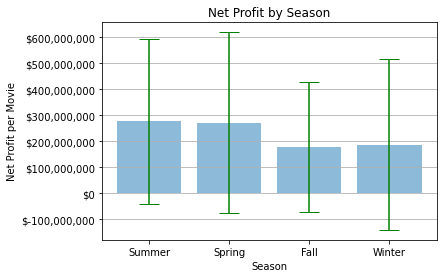

In [108]:
fig, ax = plt.subplots()

ax.bar(x, season_net, yerr=season_std, align='center', alpha=0.5, ecolor='green', capsize=10)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_ylabel('Net Profit per Movie')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Average Net Profit by Season")
ax.yaxis.grid(True)
ax.set_xlabel('Season')

**Option for this visualization**

Text(0.5, 0, 'Season')

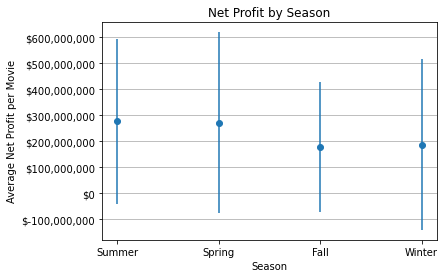

In [118]:
fig, ax = plt.subplots()

ax.errorbar(x, season_net, yerr=season_std, fmt='o' )

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)


ax.set_ylabel('Average Net Profit per Movie')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Net Profit by Season")
ax.yaxis.grid(True)
ax.set_xlabel('Season')